In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from scipy import stats

def time_elapsed(sec):
  h = int(sec/3600)
  m = int(sec/60)
  s = sec % 60
  return "{}:{:>02}:{:>05.2f}".format(h,m,s)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('H:/Projekty/House Prices/train.csv')
test = pd.read_csv('H:/Projekty/House Prices/test.csv')

In [3]:
# See how data looks
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train[0:500]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      1          60       RL         65.0     8450   Pave   NaN      Reg   
1      2          20       RL         80.0     9600   Pave   NaN      Reg   
2      3          60       RL         68.0    11250   Pave   NaN      IR1   
3      4          70       RL         60.0     9550   Pave   NaN      IR1   
4      5          60       RL         84.0    14260   Pave   NaN      IR1   
5      6          50       RL         85.0    14115   Pave   NaN      IR1   
6      7          20       RL         75.0    10084   Pave   NaN      Reg   
7      8          60       RL          NaN    10382   Pave   NaN      IR1   
8      9          50       RM         51.0     6120   Pave   NaN      Reg   
9     10         190       RL         50.0     7420   Pave   NaN      Reg   
10    11          20       RL         70.0    11200   Pave   NaN      Reg   
11    12          60       RL         85.0    11924   Pave   NaN      IR1   
12    13          20       RL          NaN    12968   Pave   NaN      IR2   
13    14          20       RL         91.0    10652   Pave   NaN      IR1   
14    15          20       RL          NaN    10920   Pave   NaN      IR1   
15    16          45       RM         51.0     6120   Pave   NaN      Reg   
16    17          20       RL          NaN    11241   Pave   NaN      IR1   
17    18          90       RL         72.0    10791   Pave   NaN      Reg   
18    19          20       RL         66.0    13695   Pave   NaN      Reg   
19    20          20       RL         70.0     7560   Pave   NaN      Reg   
20    21          60       RL        101.0    14215   Pave   NaN      IR1   
21    22          45       RM         57.0     7449   Pave  Grvl      Reg   
22    23          20       RL         75.0     9742   Pave   NaN      Reg   
23    24         120       RM         44.0     4224   Pave   NaN      Reg   
24    25          20       RL          NaN     8246   Pave   NaN      IR1   
25    26          20       RL        110.0    14230   Pave   NaN      Reg   
26    27          20       RL         60.0     7200   Pave   NaN      Reg   
27    28          20       RL         98.0    11478   Pave   NaN      Reg   
28    29          20       RL         47.0    16321   Pave   NaN      IR1   
29    30          30       RM         60.0     6324   Pave   NaN      IR1   
30    31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31    32          20       RL          NaN     8544   Pave   NaN      IR1   
32    33          20       RL         85.0    11049   Pave   NaN      Reg   
33    34          20       RL         70.0    10552   Pave   NaN      IR1   
34    35         120       RL         60.0     7313   Pave   NaN      Reg   
35    36          60       RL        108.0    13418   Pave   NaN      Reg   
36    37          20       RL        112.0    10859   Pave   NaN      Reg   
37    38          20       RL         74.0     8532   Pave   NaN      Reg   
38    39          20       RL         68.0     7922   Pave   NaN      Reg   
39    40          90       RL         65.0     6040   Pave   NaN      Reg   
40    41          20       RL         84.0     8658   Pave   NaN      Reg   
41    42          20       RL        115.0    16905   Pave   NaN      Reg   
42    43          85       RL          NaN     9180   Pave   NaN      IR1   
43    44          20       RL          NaN     9200   Pave   NaN      IR1   
44    45          20       RL         70.0     7945   Pave   NaN      Reg   
45    46         120       RL         61.0     7658   Pave   NaN      Reg   
46    47          50       RL         48.0    12822   Pave   NaN      IR1   
47    48          20       FV         84.0    11096   Pave   NaN      Reg   
48    49         190       RM         33.0     4456   Pave   NaN      Reg   
49    50          20       RL         66.0     7742   Pave   NaN      Reg   
50    51          60       RL          NaN    13869   Pave   NaN      IR2   
51

## 1.0 Fill empty values

In [5]:
df = pd.concat((train, test)).reset_index(drop=True)
# note that every column must be checked before valid filling
empties = df.isnull().sum()
print(f'Columns that need filling: \n{empties[empties > 0]}')
# see into description how to fill NaN values int True Columns

Columns that need filling: 
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


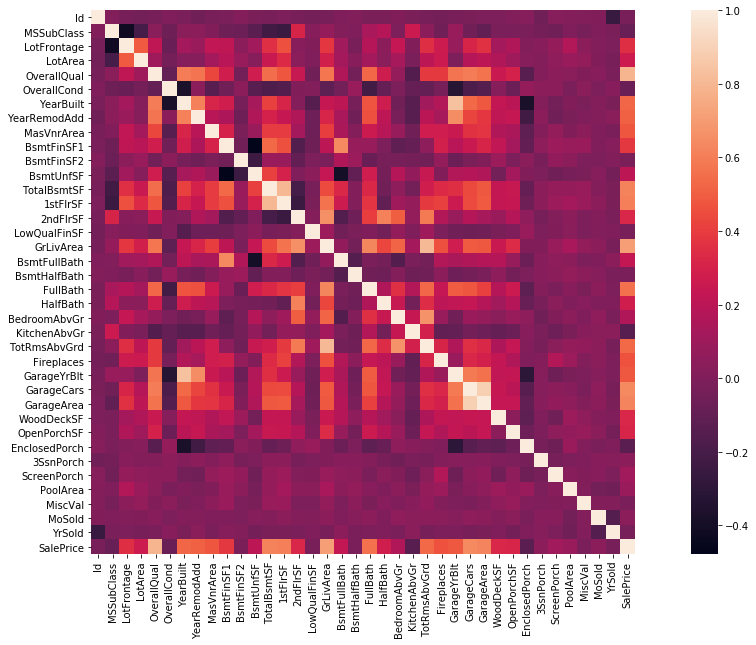

In [11]:
# See correlation of each columns, that will help to fill some empty values
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmax=1, square=True)

In [12]:
#                   LotFrontage
# Bigest correltation of this column is to 1stFlrSF
# we are assuming that there is a linear dependings of this two columns

relation=(df["1stFlrSF"]/df["LotFrontage"]).median()
df['LotFrontage'] = df['LotFrontage'].fillna(df['1stFlrSF']/relation)


In [13]:
# columns where none means no exixting item
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','FireplaceQu','MasVnrType','MSSubClass','Fence','Alley','MiscFeature','PoolQC'):
    df[col] = df[col].fillna('None')
    
# see remaining empty columns
empties = df.isnull().sum()
print(f'Columns that need filling: \n{empties[empties > 0]}')

Columns that need filling: 
MSZoning           4
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64


In [14]:
# if there are no garage or basement, these columns are empty
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    df[col] = df[col].fillna(0)
    
empties = df.isnull().sum()
print(f'Columns that need filling: \n{empties[empties > 0]}')

Columns that need filling: 
MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
Electrical        1
KitchenQual       1
Functional        2
SaleType          1
SalePrice      1459
dtype: int64


In [15]:
# fill columns with single missing with most common values
for col in ('MSZoning', 'Utilities', 'Exterior1st','Exterior2nd', 'Electrical', 'KitchenQual','Functional', 'SaleType'):
    df[col] = df[col].fillna(df[col].mode()[0])
    
empties = df.isnull().sum()
print(f'Columns that need filling: \n{empties[empties > 0]}')

# now there is only test data with empty sale price

Columns that need filling: 
SalePrice    1459
dtype: int64


## 2.0 Deal with outliers

In [16]:
# split temporary to no delete test rows by accident
train = df[df['SalePrice'].notnull()]
test = df[df['SalePrice'].isnull()]
del df

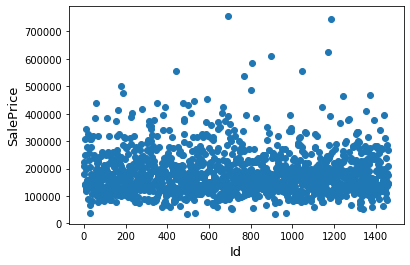

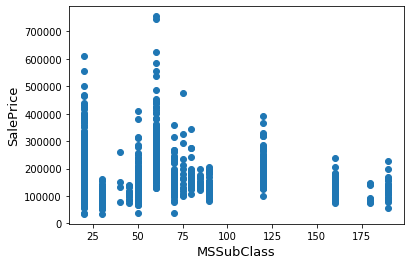

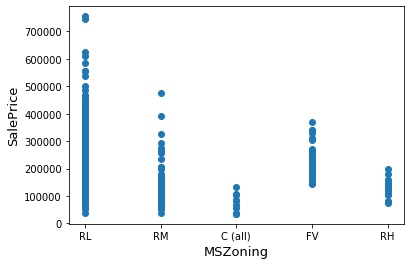

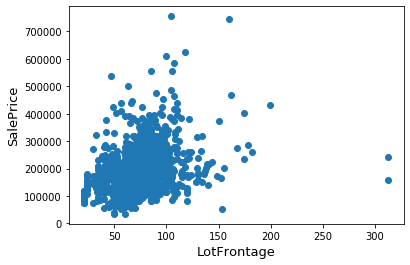

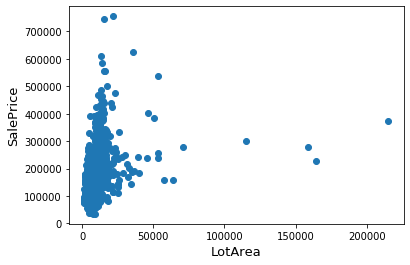

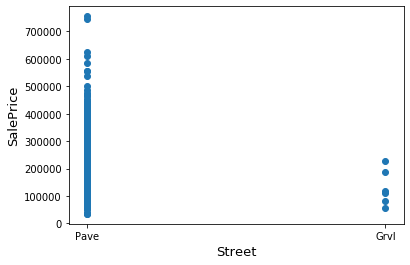

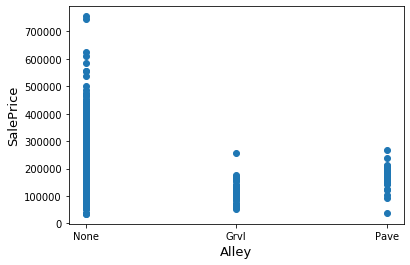

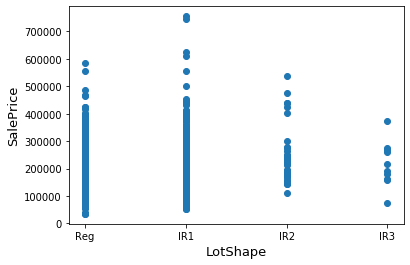

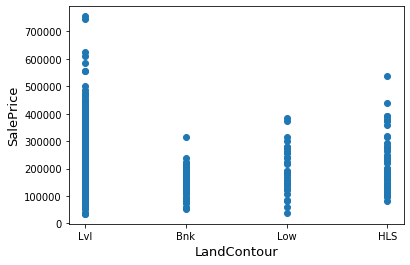

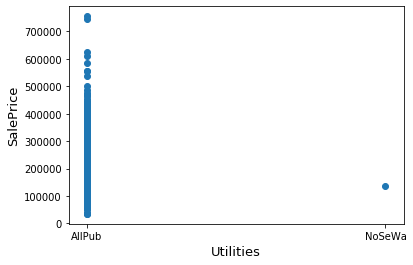

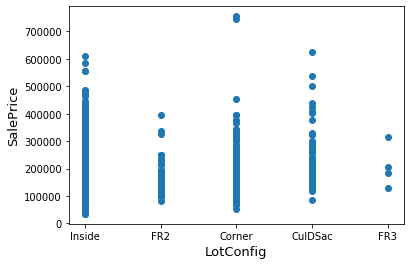

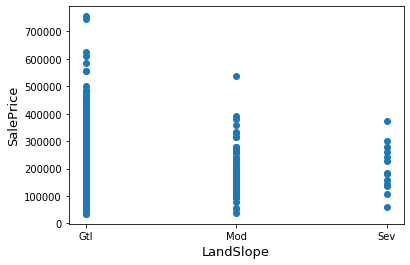

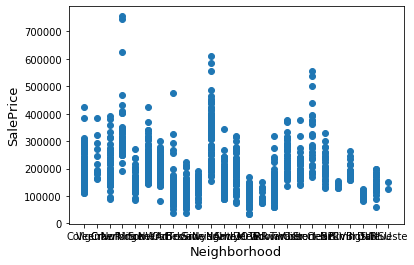

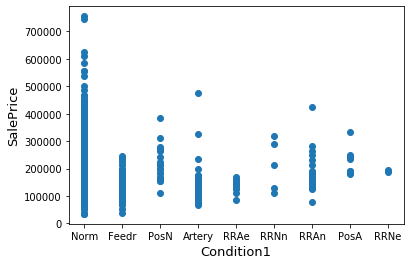

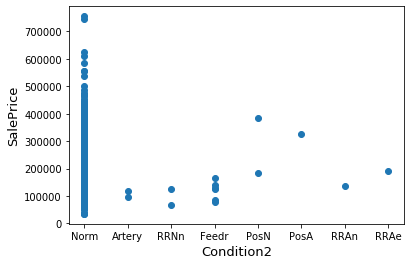

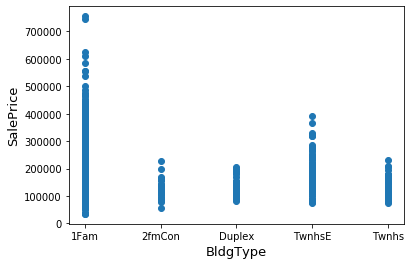

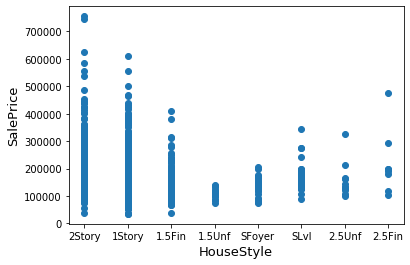

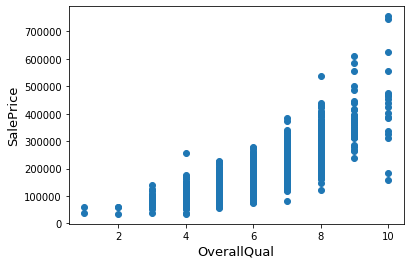

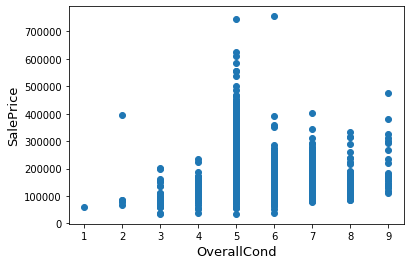

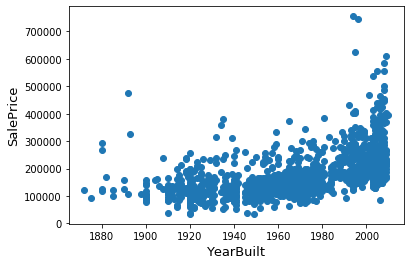

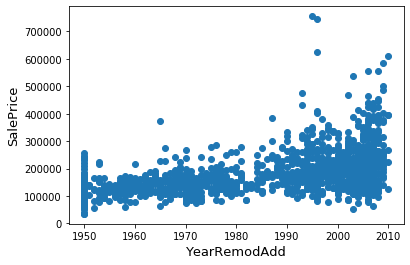

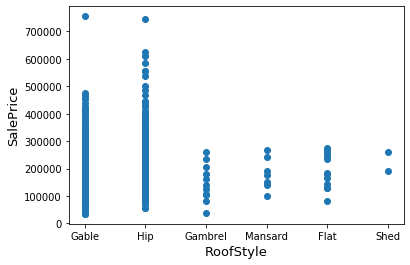

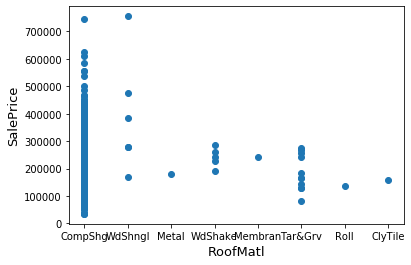

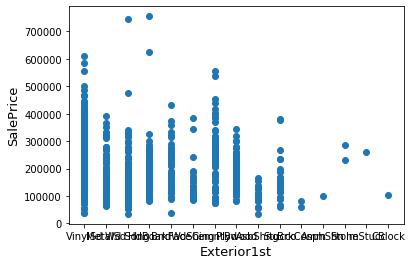

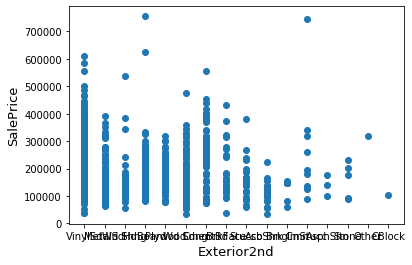

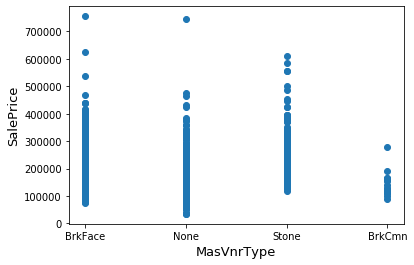

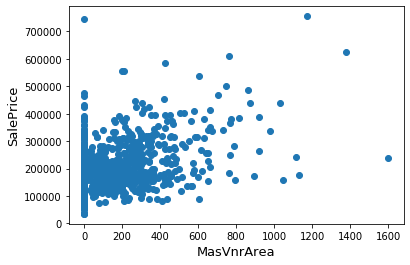

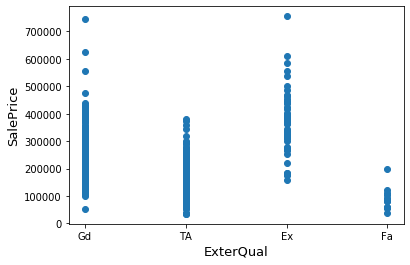

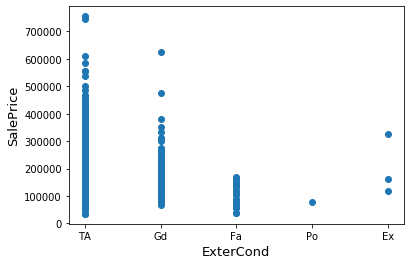

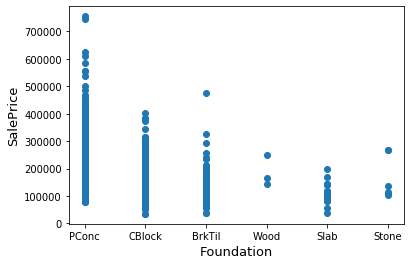

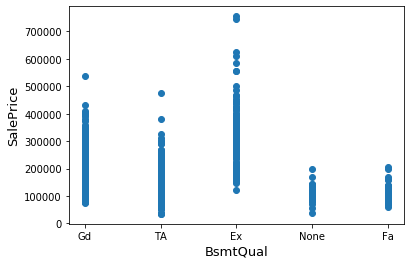

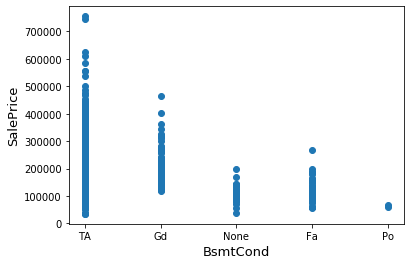

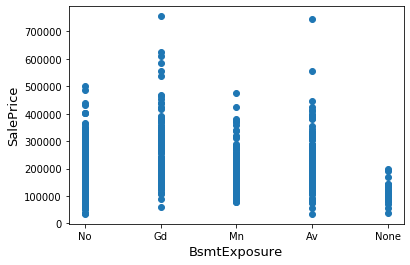

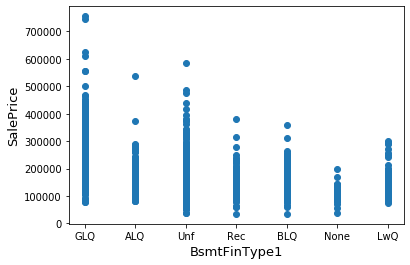

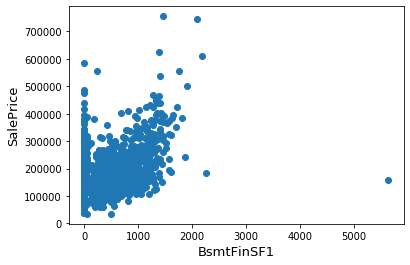

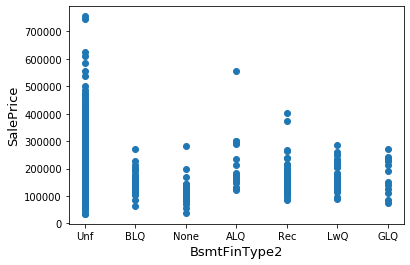

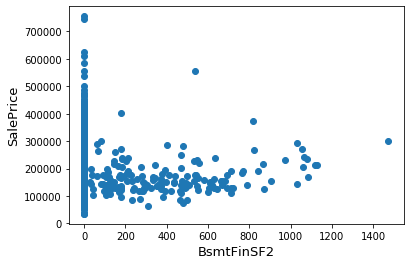

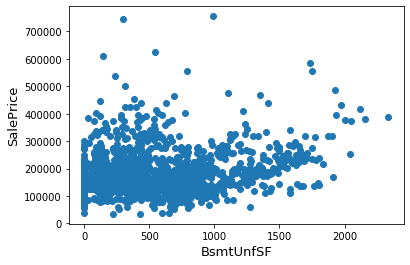

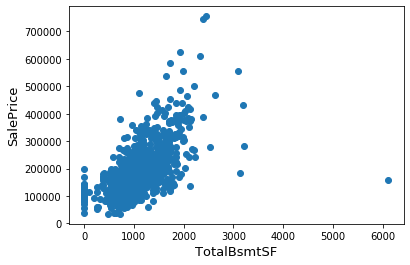

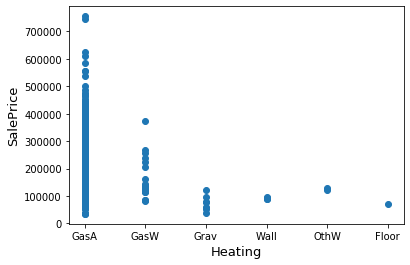

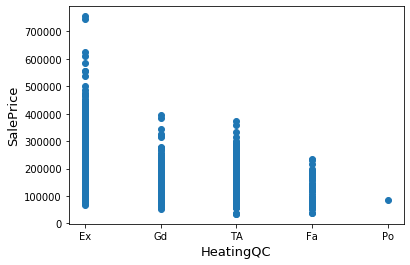

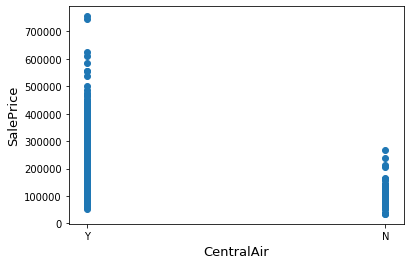

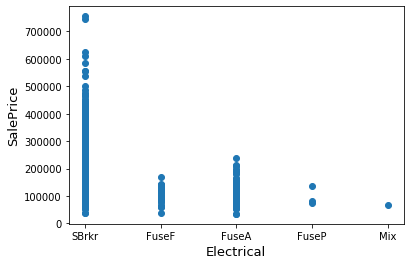

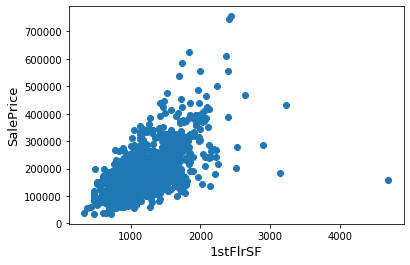

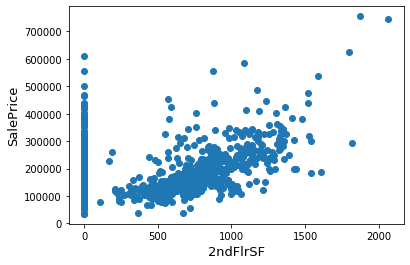

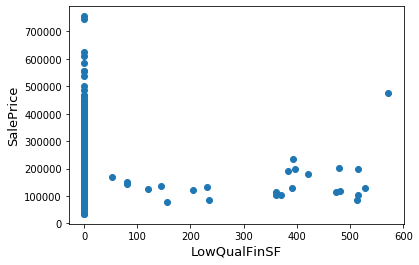

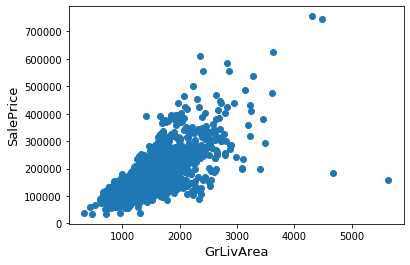

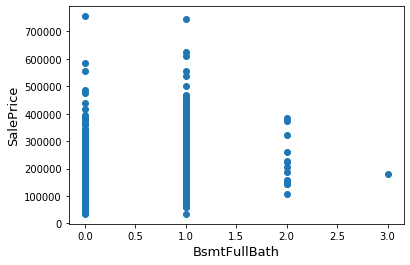

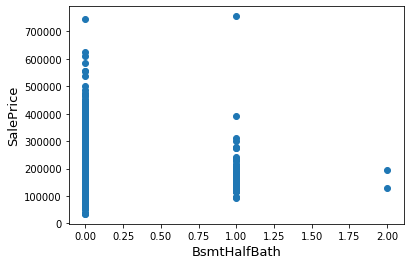

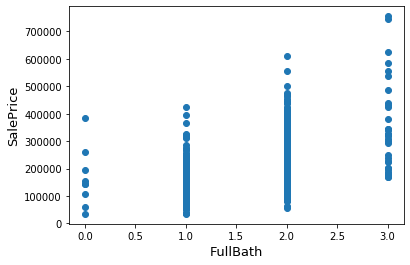

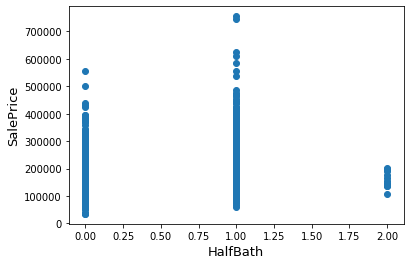

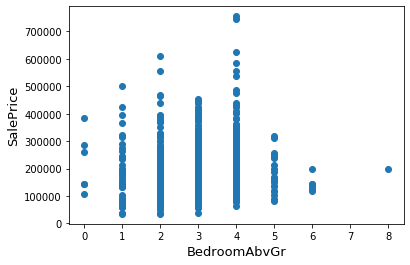

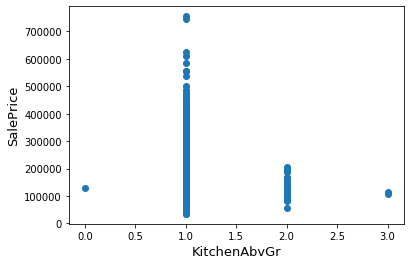

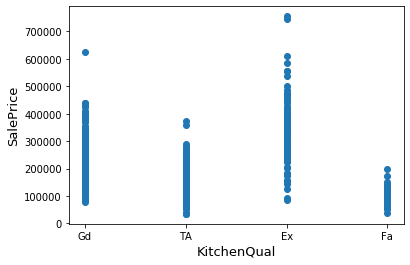

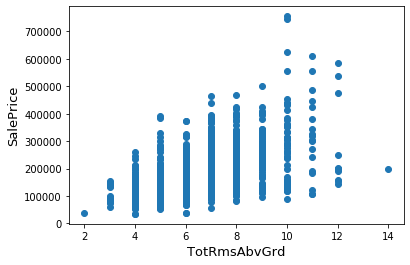

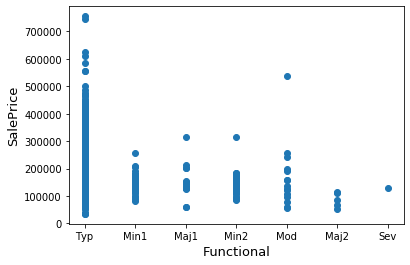

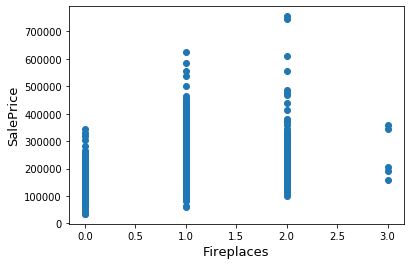

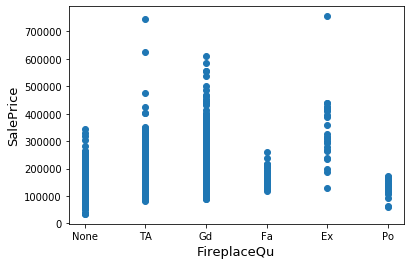

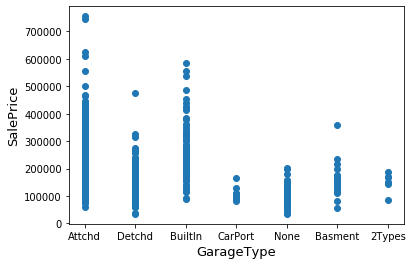

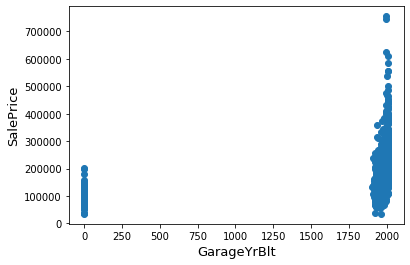

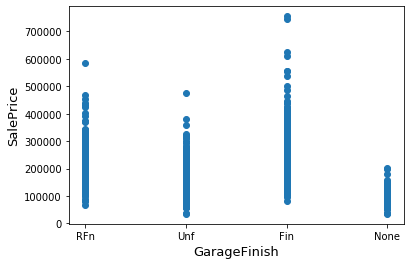

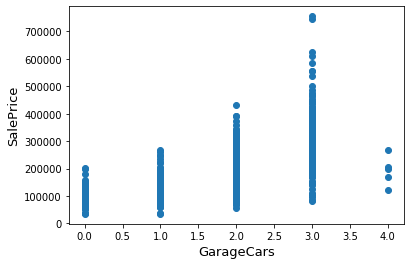

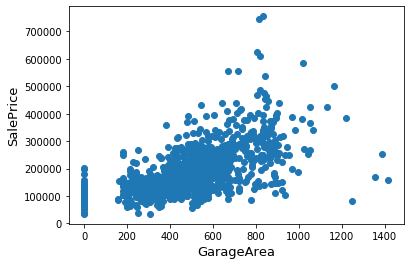

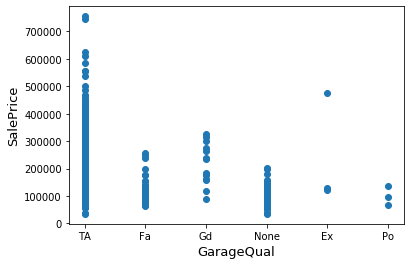

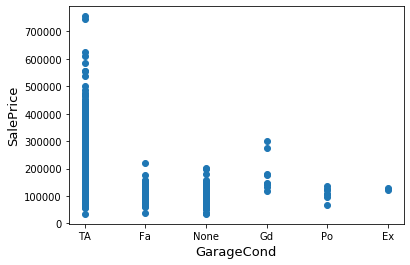

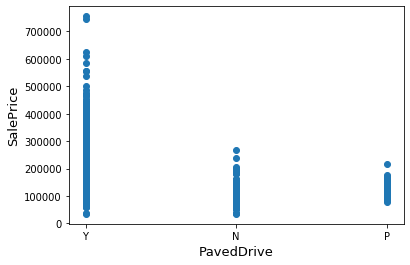

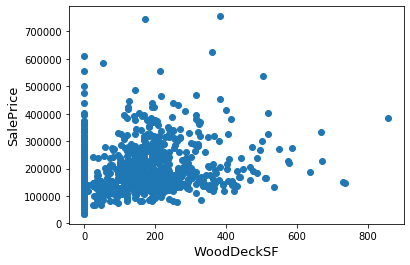

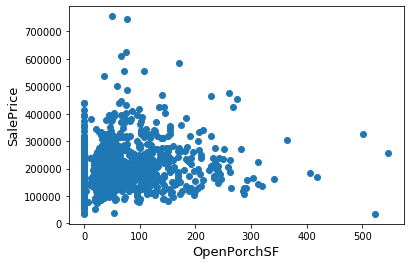

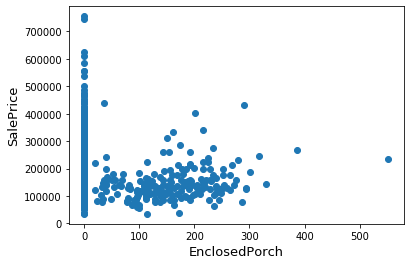

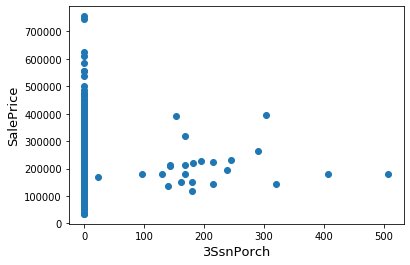

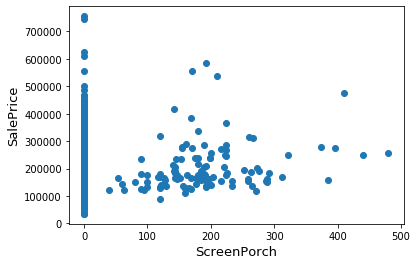

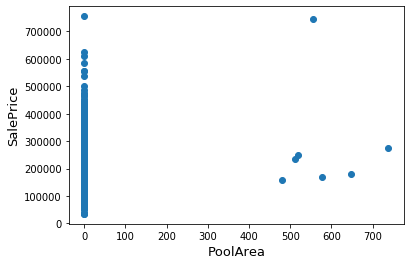

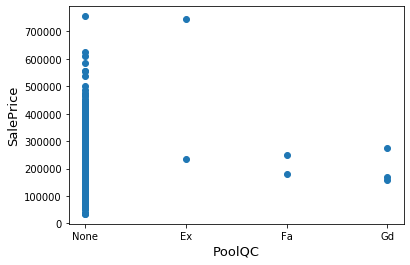

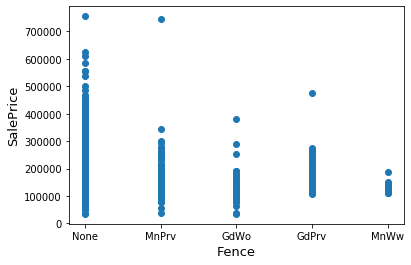

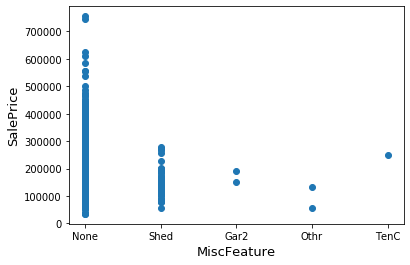

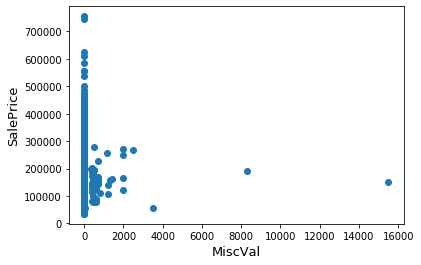

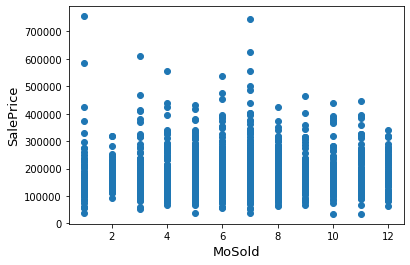

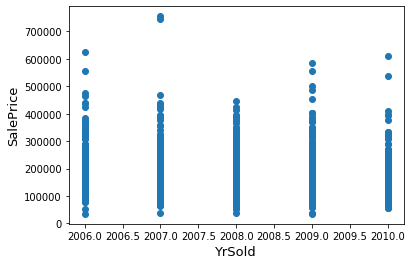

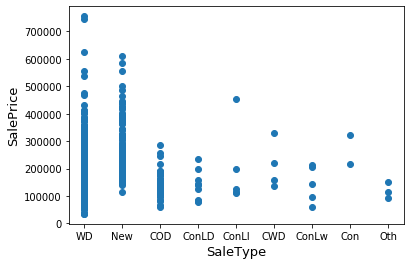

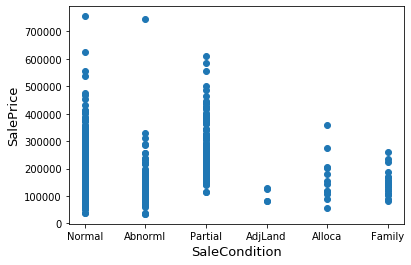

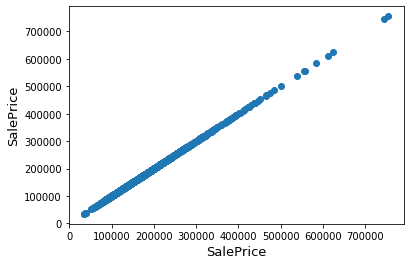

In [17]:
for col in train.columns:
    fig, ax = plt.subplots()
    ax.scatter(x = train[col], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

In [18]:
# drop outliers you saw
train = train[(train.LotFrontage <300 )]

train = train[(train.LotArea < 100000 )]

i = train[((train.OverallCond == 2) &( train.SalePrice == 300000))].index
train.drop(i,inplace=True)

train = train[(train.TotalBsmtSF < 5000 )]

train = train[(train['1stFlrSF'] < 4000 )]

i = train[((train.GrLivArea > 4000) &( train.SalePrice < 300000))].index
train.drop(i,inplace=True)

i = train[((train.GarageArea > 1200) &( train.SalePrice < 300000))].index
train.drop(i,inplace=True)


In [19]:
df = pd.concat((train, test)).reset_index(drop=True)

In [20]:
df[0:500]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      1          60       RL    65.000000     8450   Pave  None      Reg   
1      2          20       RL    80.000000     9600   Pave  None      Reg   
2      3          60       RL    68.000000    11250   Pave  None      IR1   
3      4          70       RL    60.000000     9550   Pave  None      IR1   
4      5          60       RL    84.000000    14260   Pave  None      IR1   
5      6          50       RL    85.000000    14115   Pave  None      IR1   
6      7          20       RL    75.000000    10084   Pave  None      Reg   
7      8          60       RL    68.277138    10382   Pave  None      IR1   
8      9          50       RM    51.000000     6120   Pave  None      Reg   
9     10         190       RL    50.000000     7420   Pave  None      Reg   
10    11          20       RL    70.000000    11200   Pave  None      Reg   
11    12          60       RL    85.000000    11924   Pave  None      IR1   
12    13          20       RL    56.250000    12968   Pave  None      IR2   
13    14          20       RL    91.000000    10652   Pave  None      IR1   
14    15          20       RL    77.282072    10920   Pave  None      IR1   
15    16          45       RM    51.000000     6120   Pave  None      Reg   
16    17          20       RL    61.924342    11241   Pave  None      IR1   
17    18          90       RL    72.000000    10791   Pave  None      Reg   
18    19          20       RL    66.000000    13695   Pave  None      Reg   
19    20          20       RL    70.000000     7560   Pave  None      Reg   
20    21          60       RL   101.000000    14215   Pave  None      IR1   
21    22          45       RM    57.000000     7449   Pave  Grvl      Reg   
22    23          20       RL    75.000000     9742   Pave  None      Reg   
23    24         120       RM    44.000000     4224   Pave  None      Reg   
24    25          20       RL    65.378289     8246   Pave  None      IR1   
25    26          20       RL   110.000000    14230   Pave  None      Reg   
26    27          20       RL    60.000000     7200   Pave  None      Reg   
27    28          20       RL    98.000000    11478   Pave  None      Reg   
28    29          20       RL    47.000000    16321   Pave  None      IR1   
29    30          30       RM    60.000000     6324   Pave  None      IR1   
30    31          70  C (all)    50.000000     8500   Pave  Pave      Reg   
31    32          20       RL    75.740132     8544   Pave  None      IR1   
32    33          20       RL    85.000000    11049   Pave  None      Reg   
33    34          20       RL    70.000000    10552   Pave  None      IR1   
34    35         120       RL    60.000000     7313   Pave  None      Reg   
35    36          60       RL   108.000000    13418   Pave  None      Reg   
36    37          20       RL   112.000000    10859   Pave  None      Reg   
37    38          20       RL    74.000000     8532   Pave  None      Reg   
38    39          20       RL    68.000000     7922   Pave  None      Reg   
39    40          90       RL    65.000000     6040   Pave  None      Reg   
40    41          20       RL    84.000000     8658   Pave  None      Reg   
41    42          20       RL   115.000000    16905   Pave  None      Reg   
42    43          85       RL    54.523026     9180   Pave  None      IR1   
43    44          20       RL    57.853618     9200   Pave  None      IR1   
44    45          20       RL    70.000000     7945   Pave  None      Reg   
45    46         120       RL    61.000000     7658   Pave  None      Reg   
46    47          50       RL    48.000000    12822   Pave  None      IR1   
47    48          20       FV    84.000000    11096   Pave  None      Reg   
48    49         190       RM    33.000000     4456   Pave  None      Reg   
49    50          20       RL    66.000000     7742   Pave  None      Reg   
50    51          60       RL    48.972039    13869   Pave  None      IR2   
51

## Data engineering


In [36]:
# mapping columns to be numerical                            
# some values like excellent/good/average/poor are meant to be numerical

df['ExterQualN'] = df['ExterQual'].map(
        {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['ExterQual'])

df['ExterCondN'] = df['ExterCond'].map(
        {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['ExterCond'])

df['BsmtQualN'] = df['BsmtQual'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['BsmtQual'])

df['BsmtCondN'] = df['BsmtCond'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['BsmtCond'])

df['BsmtExposureN'] = df['BsmtExposure'].map(
        {'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df = df.drop(columns=['BsmtExposure'])

df['BsmtFinType1N'] = df['BsmtFinType1'].map(
        {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df = df.drop(columns=['BsmtFinType1'])

df['BsmtFinType2N'] = df['BsmtFinType2'].map(
        {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df = df.drop(columns=['BsmtFinType2'])

df['HeatingQCN'] = df['HeatingQC'].map(
        {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['HeatingQC'])

df['CentralAirN'] = df['CentralAir'].map(
        {'N':0,'Y':1})
df = df.drop(columns=['CentralAir'])

df['KitchenQualN'] = df['KitchenQual'].map(
        {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['KitchenQual'])

df['FireplaceQuN'] = df['FireplaceQu'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['FireplaceQu'])

df['GarageQualN'] = df['GarageQual'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['GarageQual'])

df['GarageCondN'] = df['GarageCond'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['GarageCond'])

df['PoolQCN'] = df['PoolQC'].map(
        {'None':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['PoolQC'])

df['Fence1N'] = df['Fence'].map(
        {'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})
df = df.drop(columns=['Fence'])

#df.YrSold.unique() 
df['YrSoldN'] = df['YrSold'].map(
        {'2006':0,'2007':1,'2008':2,'2009':3,'2010':4})
df = df.drop(columns=['YrSold'])

In [37]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [34]:
# Gets categorical
for col in df.columns:
    if (df[col].dtypes == 'O'):
        df = pd.get_dummies(data=df, columns=[col])
        

dtype('O')

In [40]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [52]:
df = df.drop(['Id'], axis=1)


X_train = df[df['SalePrice'].notnull()]
Y_train = X_train['SalePrice']
X_train.drop(['SalePrice'], axis=1)
X_train = downcast_dtypes(X_train)

X_test = df[df['SalePrice'].isnull()]
X_test.drop(['SalePrice'], axis=1)
X_test = downcast_dtypes(X_test)
del df

C:\Users\Adrian\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [60]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=1)

In [86]:
ts = time.time()

model = XGBRegressor(
    max_depth=15,
    n_estimators=100000,
    colsample_bytree=0.5, 
    subsample=0.8, 
    eta=0.081,
    tree_method='gpu_hist',
    reg_lambda = 0.4,
    seed=140)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 50)

print(f' time elapsed: {time_elapsed(time.time() - ts)}')



[0]	validation_0-rmse:183647.54688	validation_1-rmse:180302.62500
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:169070.10938	validation_1-rmse:165801.89062
[2]	validation_0-rmse:155978.57812	validation_1-rmse:153300.87500
[3]	validation_0-rmse:143923.42188	validation_1-rmse:141581.21875
[4]	validation_0-rmse:132512.18750	validation_1-rmse:130416.66406
[5]	validation_0-rmse:121969.05469	validation_1-rmse:120130.22656
[6]	validation_0-rmse:112352.57031	validation_1-rmse:110641.07812
[7]	validation_0-rmse:103720.16406	validation_1-rmse:102332.77344
[8]	validation_0-rmse:95842.73438	validation_1-rmse:94607.79688
[9]	validation_0-rmse:88561.60938	validation_1-rmse:87701.44531
[10]	validation_0-rmse:81580.77344	validation_1-rmse:80884.84375
[11]	validation_0-rmse:75200.11719	validation_1-rmse:74536.00781
[12]	validation_0-rmse:69261.39844	validation_1-rmse:68

[127]	validation_0-rmse:91.09912	validation_1-rmse:8406.05957
[128]	validation_0-rmse:88.41548	validation_1-rmse:8406.25684
[129]	validation_0-rmse:86.00549	validation_1-rmse:8406.74414
[130]	validation_0-rmse:83.19385	validation_1-rmse:8406.08203
[131]	validation_0-rmse:80.02873	validation_1-rmse:8405.53027
[132]	validation_0-rmse:76.19084	validation_1-rmse:8404.85449
[133]	validation_0-rmse:73.81454	validation_1-rmse:8404.48438
[134]	validation_0-rmse:71.00540	validation_1-rmse:8403.76172
[135]	validation_0-rmse:69.41849	validation_1-rmse:8403.96484
[136]	validation_0-rmse:66.83922	validation_1-rmse:8402.41309
[137]	validation_0-rmse:65.38054	validation_1-rmse:8402.45996
[138]	validation_0-rmse:63.97425	validation_1-rmse:8402.25195
[139]	validation_0-rmse:60.89671	validation_1-rmse:8401.08106
[140]	validation_0-rmse:59.44006	validation_1-rmse:8401.10449
[141]	validation_0-rmse:57.14645	validation_1-rmse:8400.45703
[142]	validation_0-rmse:55.81950	validation_1-rmse:8400.22461
[143]	va

[261]	validation_0-rmse:0.71762	validation_1-rmse:8391.94531
[262]	validation_0-rmse:0.69647	validation_1-rmse:8391.94531
[263]	validation_0-rmse:0.66552	validation_1-rmse:8391.94531
[264]	validation_0-rmse:0.64245	validation_1-rmse:8391.94336
[265]	validation_0-rmse:0.61570	validation_1-rmse:8391.94043
[266]	validation_0-rmse:0.59092	validation_1-rmse:8391.94141
[267]	validation_0-rmse:0.56572	validation_1-rmse:8391.94434
[268]	validation_0-rmse:0.54086	validation_1-rmse:8391.94434
[269]	validation_0-rmse:0.52393	validation_1-rmse:8391.94336
[270]	validation_0-rmse:0.50762	validation_1-rmse:8391.93652
[271]	validation_0-rmse:0.48633	validation_1-rmse:8391.93750
[272]	validation_0-rmse:0.46887	validation_1-rmse:8391.93457
[273]	validation_0-rmse:0.44926	validation_1-rmse:8391.93457
[274]	validation_0-rmse:0.44270	validation_1-rmse:8391.92969
[275]	validation_0-rmse:0.42754	validation_1-rmse:8391.93164
[276]	validation_0-rmse:0.41051	validation_1-rmse:8391.92773
[277]	validation_0-rmse:

[396]	validation_0-rmse:0.08679	validation_1-rmse:8391.90625
[397]	validation_0-rmse:0.08669	validation_1-rmse:8391.90625
[398]	validation_0-rmse:0.08665	validation_1-rmse:8391.90625
[399]	validation_0-rmse:0.08659	validation_1-rmse:8391.90527
[400]	validation_0-rmse:0.08658	validation_1-rmse:8391.90527
[401]	validation_0-rmse:0.08657	validation_1-rmse:8391.90625
[402]	validation_0-rmse:0.08649	validation_1-rmse:8391.90527
[403]	validation_0-rmse:0.08639	validation_1-rmse:8391.90527
[404]	validation_0-rmse:0.08622	validation_1-rmse:8391.90527
[405]	validation_0-rmse:0.08622	validation_1-rmse:8391.90527
[406]	validation_0-rmse:0.08570	validation_1-rmse:8391.90527
[407]	validation_0-rmse:0.08565	validation_1-rmse:8391.90527
[408]	validation_0-rmse:0.08563	validation_1-rmse:8391.90527
[409]	validation_0-rmse:0.08547	validation_1-rmse:8391.90527
[410]	validation_0-rmse:0.08543	validation_1-rmse:8391.90430
[411]	validation_0-rmse:0.08540	validation_1-rmse:8391.90430
[412]	validation_0-rmse:

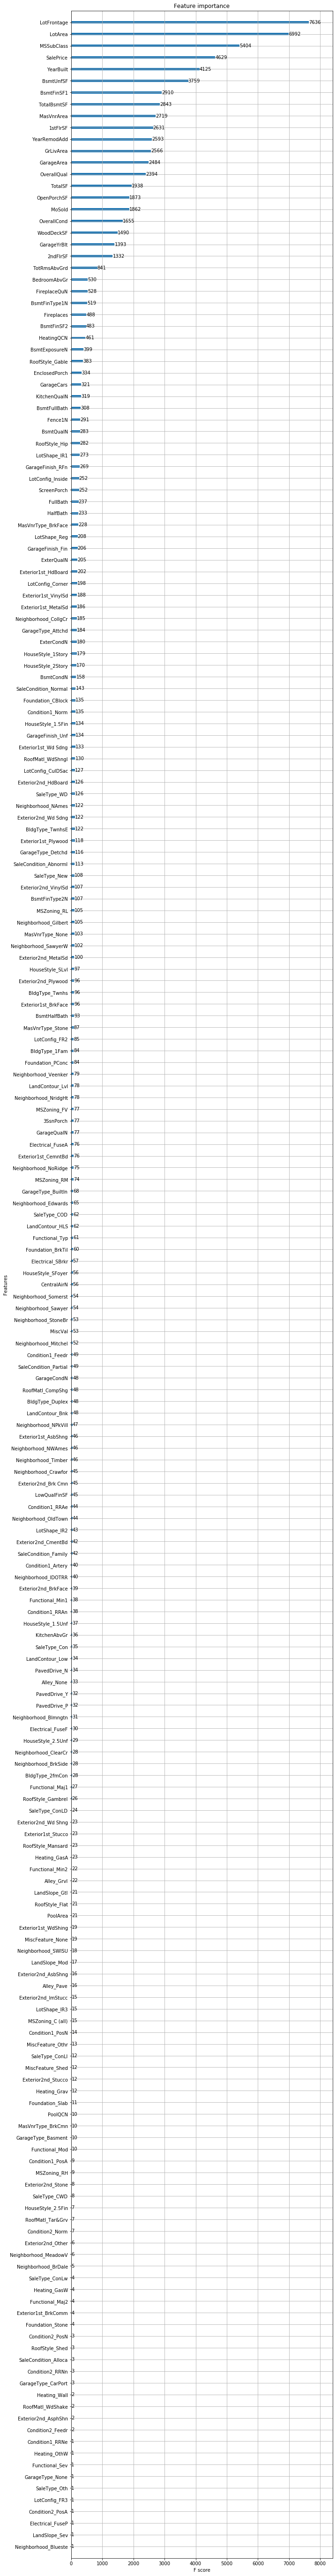

In [87]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,100))

In [88]:
test = pd.read_csv('H:/Projekty/House Prices/test.csv')
Y_test = model.predict(X_test)
submission = pd.DataFrame({
    "Id": test.Id, 
    "SalePrice": Y_test
})
submission.to_csv('H:/Projekty/House Prices/submission1.csv', index=False)